<a href="https://colab.research.google.com/github/Andreher00/ml-project/blob/main/progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning for cell type classification from single nucleus RNA sequencing data

---



In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Reading mouse brain dataset

In [3]:
data = pd.read_csv('/content/drive/MyDrive/progettoML/brain_counts.csv.gz')
annotations = pd.read_csv('/content/drive/MyDrive/progettoML/brain_metadata.csv')

In [4]:
annotations["cell_ontology_class"].value_counts()

oligodendrocyte                   1574
endothelial cell                   715
astrocyte                          432
neuron                             281
oligodendrocyte precursor cell     203
brain pericyte                     156
Bergmann glial cell                 40
Name: cell_ontology_class, dtype: int64

In [5]:
data.shape

(3401, 23434)

In [6]:
data.head()

,Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
0,A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54,0
1,A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,...,0,0,0,0,0,195,0,0,113,0
3,A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,...,0,0,0,0,125,0,1,0,0,0
4,A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,...,0,0,0,81,0,0,0,0,0,0


In [7]:
annotations.head()

,cell,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
0,A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
1,A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728
2,A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
3,A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564
4,A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923


In [8]:
data.index = data['Unnamed: 0']

In [9]:
data = data.drop('Unnamed: 0', axis=1)
# change index name to cell
data.index.name = 'cell'

In [10]:
data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
cell,,,,,,,,,,,,,,,,,,,,,
A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54,0
A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,0,...,0,0,0,0,0,195,0,0,113,0
A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,14,...,0,0,0,0,125,0,1,0,0,0
A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,0,...,0,0,0,81,0,0,0,0,0,0


In [11]:
annotations.index = annotations["cell"]

In [12]:
data= data.merge(annotations[['cell_ontology_class']], on='cell', how='inner')

In [13]:
data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene,cell_ontology_class
cell,,,,,,,,,,,,,,,,,,,,,
A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,54,0,astrocyte
A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,0,...,0,0,0,0,0,0,0,0,0,astrocyte
A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,0,...,0,0,0,0,195,0,0,113,0,oligodendrocyte
A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,14,...,0,0,0,125,0,1,0,0,0,endothelial cell
A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,0,...,0,0,81,0,0,0,0,0,0,astrocyte


In [14]:
X = data.drop('cell_ontology_class', axis=1)
y = data['cell_ontology_class']

In [15]:
data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene,cell_ontology_class
cell,,,,,,,,,,,,,,,,,,,,,
A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,54,0,astrocyte
A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,0,...,0,0,0,0,0,0,0,0,0,astrocyte
A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,0,...,0,0,0,0,195,0,0,113,0,oligodendrocyte
A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,14,...,0,0,0,125,0,1,0,0,0,endothelial cell
A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,0,...,0,0,81,0,0,0,0,0,0,astrocyte


In [16]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

## KNN

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [77]:
#standardization
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [83]:
# apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)

In [84]:
# apply PCA to test set
X_test_pca = pca.transform(X_test)

In [85]:
# apply knn to predict cell type

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [88]:
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=0))
print(accuracy_score(y_test,y_pred))

                                precision    recall  f1-score   support

                     astrocyte       0.90      0.86      0.88       107
                brain pericyte       1.00      0.51      0.68        39
              endothelial cell       1.00      0.47      0.64       174
                        neuron       1.00      0.12      0.22        65
               oligodendrocyte       0.63      0.99      0.77       399
oligodendrocyte precursor cell       0.00      0.00      0.00        57

                      accuracy                           0.71       841
                     macro avg       0.76      0.49      0.53       841
                  weighted avg       0.74      0.71      0.66       841

0.7122473246135553


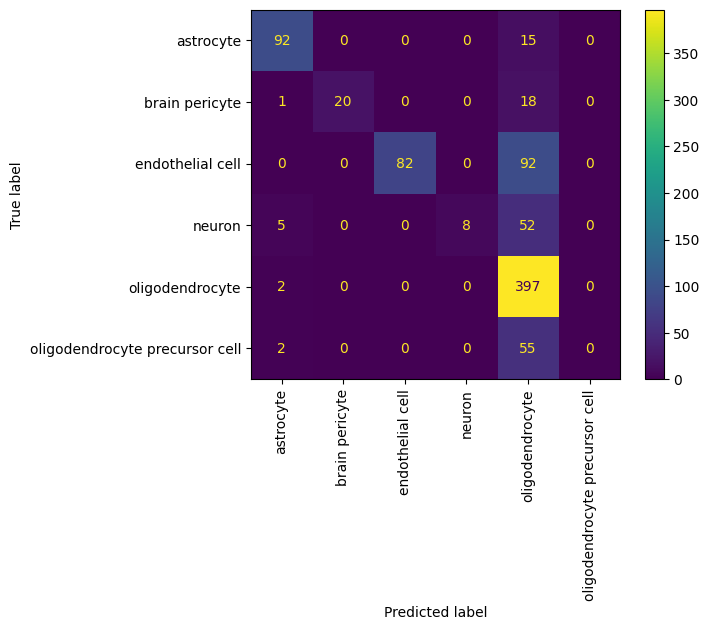

In [89]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical')

**Cross Validation to get the best value of K**


Text(0, 0.5, 'Accuracy Score')

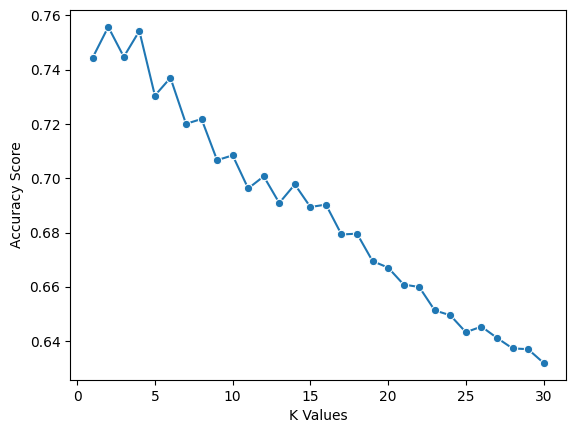

In [94]:
k_values=[i for i in range(1,31)]
scores=[]
scaler=StandardScaler()
X=scaler.fit_transform(X)
for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  score=cross_val_score(knn,X,y, cv=5)
  scores.append(np.mean(score))
sns.lineplot(x = k_values , y= scores, marker ='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [95]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
knn = KNeighborsClassifier(n_neighbors =best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [96]:
y_pred = knn.predict (X_test)

knn_accuracy =accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
print("Accuracy:", knn_accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6206896551724138
Precision: 0.6206896551724138
Recall: 0.6206896551724138



# PIPELINE SVM

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pca = PCA(n_components=50)
scaler = StandardScaler()
svm = SVC()
pipe = Pipeline([('scaler', scaler), ('pca', pca), ('svm', svm)])

param_grid = {
	"svm__C": [0.01, 0.05, 0.1],
	"svm__kernel": ["linear", "rbf", "poly"],
	# "svm__degree": range(2, 6), # degree for polynomial kernel
	"svm__class_weight": [None, "balanced"]
}


In [18]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=3)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=50)),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.01, 0.05, 0.1],
                         'svm__class_weight': [None, 'balanced'],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [19]:
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.950):
{'svm__C': 0.05, 'svm__class_weight': None, 'svm__kernel': 'linear'}


In [20]:
grid.score(X_test, y_test)

0.9435957696827262

In [21]:
estimator = grid.best_estimator_

0.9454374123924559
                                precision    recall  f1-score   support

           Bergmann glial cell       0.50      0.86      0.63        14
                     astrocyte       0.94      0.87      0.90       116
                brain pericyte       0.91      0.96      0.93        45
              endothelial cell       0.98      0.97      0.98       184
                        neuron       0.88      0.94      0.91        70
               oligodendrocyte       0.98      0.96      0.97       381
oligodendrocyte precursor cell       0.93      0.90      0.91        41

                      accuracy                           0.94       851
                     macro avg       0.87      0.92      0.89       851
                  weighted avg       0.95      0.94      0.95       851



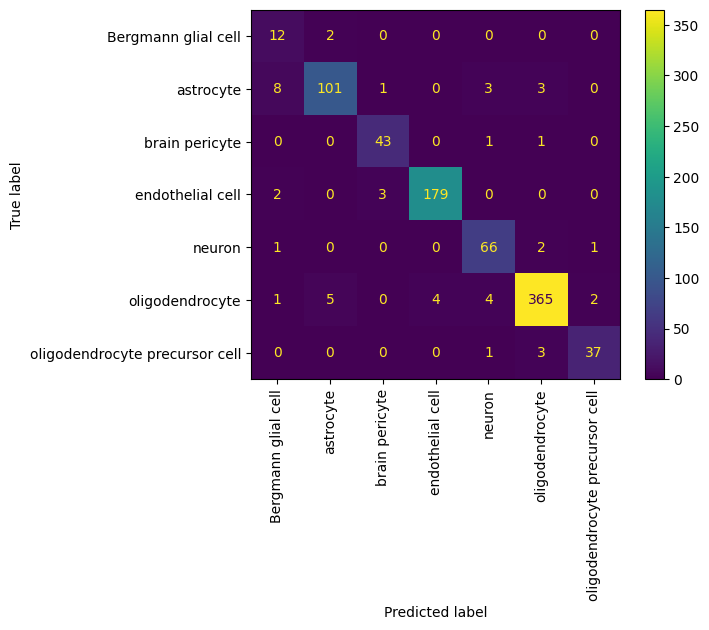

In [22]:
y_pred = estimator.predict(X_test)
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, classification_report
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test,y_pred))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical')

# PIPELINE RANDOM FOREST

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pca = PCA()
scaler = StandardScaler()
rfc = RandomForestClassifier()
pipe = Pipeline([('scaler', scaler), ('pca', pca), ('rfc', rfc)])

param_grid = {
    "pca__n_components": [30, 50, 100],
    "rfc__n_estimators": [100, 150, 200],
    "rfc__class_weight": [None, "balanced"]
}

In [24]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [30, 50, 100],
                         'rfc__class_weight': [None, 'balanced'],
                         'rfc__n_estimators': [100, 150, 200]},
             verbose=3)

In [25]:
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.957):
{'pca__n_components': 50, 'rfc__class_weight': None, 'rfc__n_estimators': 200}


In [26]:
grid.score(X_test, y_test)

0.9518213866039953

In [27]:
estimator = grid.best_estimator_

In [28]:
y_pred = estimator.predict(X_test)
from sklearn.metrics import f1_score, confusion_matrix
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test,y_pred))

0.9514494906693985
                                precision    recall  f1-score   support

           Bergmann glial cell       0.90      0.64      0.75        14
                     astrocyte       0.92      0.93      0.92       116
                brain pericyte       0.93      0.91      0.92        45
              endothelial cell       0.98      0.97      0.98       184
                        neuron       0.89      0.93      0.91        70
               oligodendrocyte       0.97      0.97      0.97       381
oligodendrocyte precursor cell       0.93      0.93      0.93        41

                      accuracy                           0.95       851
                     macro avg       0.93      0.90      0.91       851
                  weighted avg       0.95      0.95      0.95       851



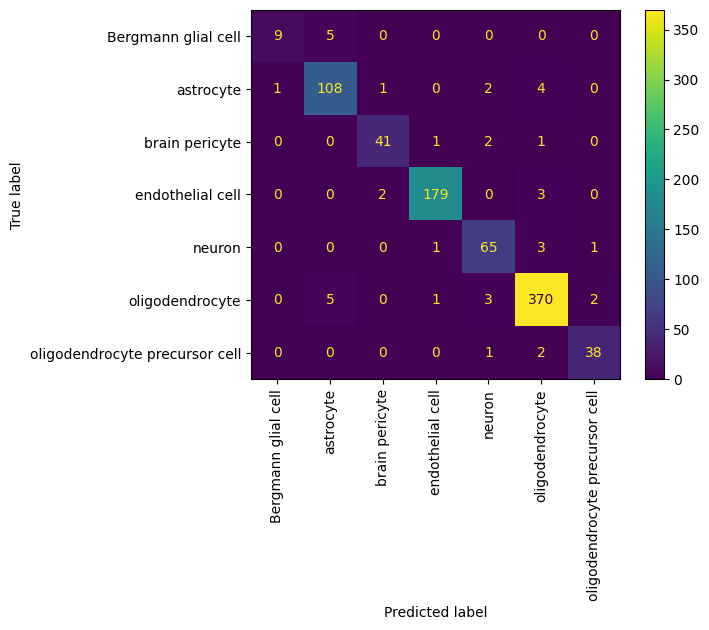

In [29]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical')

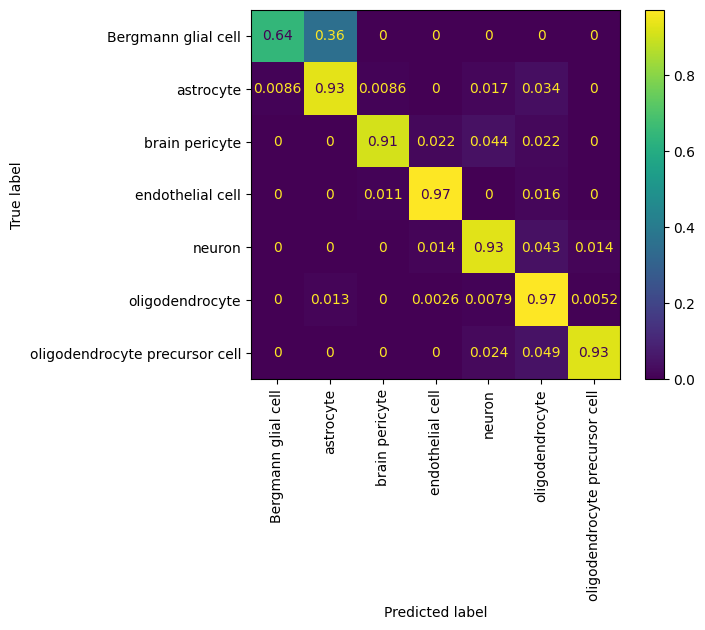

In [30]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical', normalize='true')

SENZA BERGMANN GLIAL CELL

In [31]:
data = data[data.cell_ontology_class != 'Bergmann glial cell']
data.shape

(3361, 23434)

In [32]:
X = data.drop('cell_ontology_class', axis=1)
y = data['cell_ontology_class']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
pca = PCA(n_components=50)
scaler = StandardScaler()
svm = SVC()
pipe = Pipeline([('scaler', scaler), ('pca', pca), ('svm', svm)])

param_grid = {
	"svm__C": [0.01, 0.05, 0.1],
	"svm__kernel": ["linear", "rbf", "poly"],
	# "svm__degree": range(2, 6), # degree for polynomial kernel
	"svm__class_weight": [None, "balanced"]
}

In [35]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=50)),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.01, 0.05, 0.1],
                         'svm__class_weight': [None, 'balanced'],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [36]:
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.953):
{'svm__C': 0.1, 'svm__class_weight': 'balanced', 'svm__kernel': 'linear'}


In [37]:
grid.score(X_test, y_test)

0.9560047562425684

In [38]:
estimator = grid.best_estimator_

0.9564359013840503
                                precision    recall  f1-score   support

                     astrocyte       0.95      0.93      0.94       107
                brain pericyte       0.88      0.97      0.93        39
              endothelial cell       0.99      0.98      0.99       174
                        neuron       0.85      0.97      0.91        65
               oligodendrocyte       0.97      0.95      0.96       399
oligodendrocyte precursor cell       0.91      0.93      0.92        57

                      accuracy                           0.96       841
                     macro avg       0.93      0.96      0.94       841
                  weighted avg       0.96      0.96      0.96       841



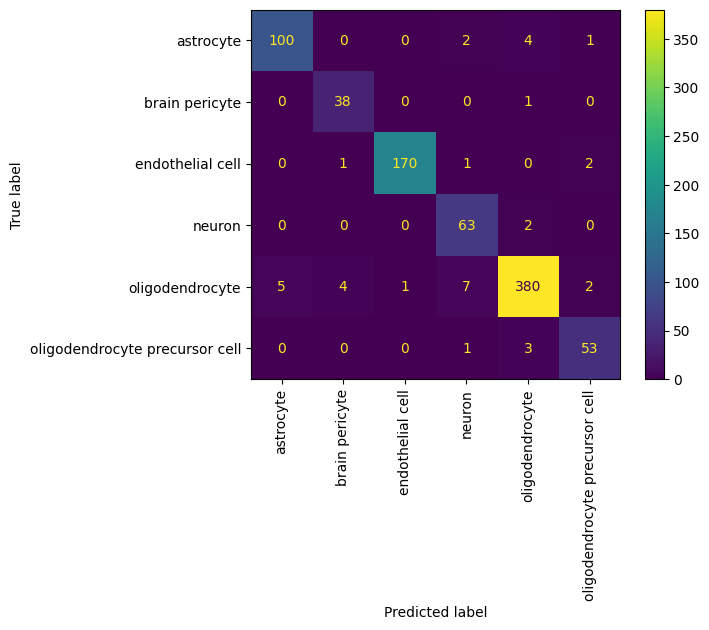

In [39]:
y_pred = estimator.predict(X_test)
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, classification_report
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test,y_pred))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical')